## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
from tensorflow.python import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 40
BATCH_SIZE = 512
MOMENTUM = 0.95

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 4s 73us/sample - loss: 1.9101 - accuracy: 0.3181 - val_loss: 1.7203 - val_accuracy: 0.3966
Epoch 2/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.6603 - accuracy: 0.4139 - val_loss: 1.5983 - val_accuracy: 0.4373
Epoch 3/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.5688 - accuracy: 0.4470 - val_loss: 1.5304 - val_accuracy: 0.4599
Epoch 4/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.4973 - accuracy: 0.4688 - val_loss: 1.4801 - val_accuracy: 0.4742
Epoch 5/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.4415 - accuracy: 0.4894 - val_loss: 1.4429 - val_accuracy: 0.4852
Epoch 6/40
50000/50000 [==============================] - 3s 61us/sample - loss: 1.3993 - accuracy: 0.5055 - val_loss: 1.4252 - val_accuracy: 0.4906
Epoch 7/40
50000/50000 [==============================] 

50000/50000 [==============================] - 3s 64us/sample - loss: 1.6212 - accuracy: 0.4338 - val_loss: 1.6212 - val_accuracy: 0.4277
Epoch 9/40
50000/50000 [==============================] - 3s 65us/sample - loss: 1.5971 - accuracy: 0.4434 - val_loss: 1.5975 - val_accuracy: 0.4370
Epoch 10/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.5753 - accuracy: 0.4499 - val_loss: 1.5782 - val_accuracy: 0.4417
Epoch 11/40
50000/50000 [==============================] - 3s 62us/sample - loss: 1.5554 - accuracy: 0.4567 - val_loss: 1.5638 - val_accuracy: 0.4507
Epoch 12/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.5365 - accuracy: 0.4624 - val_loss: 1.5478 - val_accuracy: 0.4551
Epoch 13/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.5182 - accuracy: 0.4695 - val_loss: 1.5394 - val_accuracy: 0.4584
Epoch 14/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.5016 - accuracy: 0.4745 - val

50000/50000 [==============================] - 3s 65us/sample - loss: 1.8782 - accuracy: 0.3481 - val_loss: 1.8719 - val_accuracy: 0.3543
Epoch 16/40
50000/50000 [==============================] - 3s 61us/sample - loss: 1.8677 - accuracy: 0.3516 - val_loss: 1.8628 - val_accuracy: 0.3559
Epoch 17/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.8578 - accuracy: 0.3539 - val_loss: 1.8533 - val_accuracy: 0.3590
Epoch 18/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.8490 - accuracy: 0.3573 - val_loss: 1.8445 - val_accuracy: 0.3584
Epoch 19/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.8406 - accuracy: 0.3600 - val_loss: 1.8366 - val_accuracy: 0.3639
Epoch 20/40
50000/50000 [==============================] - 3s 64us/sample - loss: 1.8328 - accuracy: 0.3619 - val_loss: 1.8291 - val_accuracy: 0.3652
Epoch 21/40
50000/50000 [==============================] - 3s 63us/sample - loss: 1.8256 - accuracy: 0.3649 - va

50000/50000 [==============================] - 3s 64us/sample - loss: 2.1426 - accuracy: 0.2383 - val_loss: 2.1407 - val_accuracy: 0.2390
Epoch 23/40
50000/50000 [==============================] - 3s 66us/sample - loss: 2.1370 - accuracy: 0.2423 - val_loss: 2.1351 - val_accuracy: 0.2430
Epoch 24/40
50000/50000 [==============================] - 3s 64us/sample - loss: 2.1315 - accuracy: 0.2445 - val_loss: 2.1297 - val_accuracy: 0.2440
Epoch 25/40
50000/50000 [==============================] - 3s 64us/sample - loss: 2.1262 - accuracy: 0.2476 - val_loss: 2.1244 - val_accuracy: 0.2470
Epoch 26/40
50000/50000 [==============================] - 3s 65us/sample - loss: 2.1211 - accuracy: 0.2492 - val_loss: 2.1192 - val_accuracy: 0.2490
Epoch 27/40
50000/50000 [==============================] - 3s 65us/sample - loss: 2.1160 - accuracy: 0.2516 - val_loss: 2.1142 - val_accuracy: 0.2521
Epoch 28/40
50000/50000 [==============================] - 3s 65us/sample - loss: 2.1112 - accuracy: 0.2542 - va

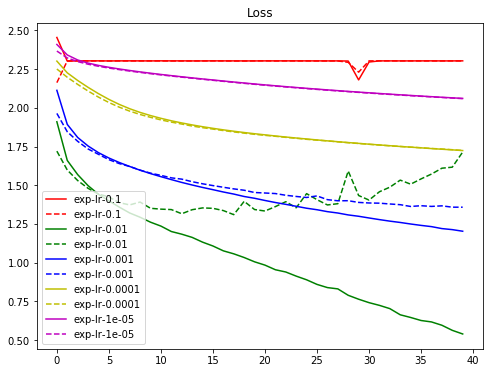

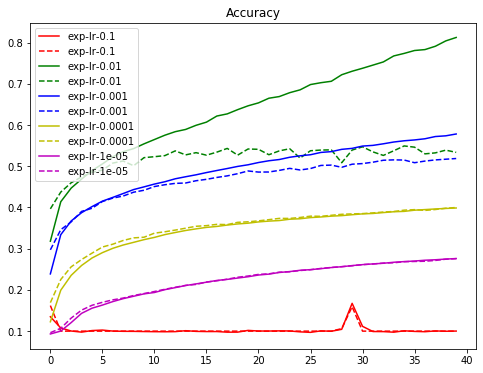

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()